# Mini-Batch Stochastic Gradient Descent


In [1]:
import tensorflow as tf
from d2l.tensorflow import losses, models, initializers, data, optimizers
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display
display.set_matplotlib_formats('svg')

In [2]:
file = np.genfromtxt('../data/airfoil_self_noise.dat', delimiter='\t')
file = (file - file.mean(axis=0)) / file.std(axis=0)
features = tf.convert_to_tensor(file[:1500, :-1], dtype=tf.float32)
labels = tf.convert_to_tensor(file[:1500, -1], dtype=tf.float32)

In [3]:
def train(optimizer, learning_rate, features, labels, batch_size=10, num_epochs=2):

    net, loss_f = models.linreg, losses.squared_loss
    W, b = initializers.initialize_parameters(features.shape[1], 1)

    def eval_loss():
        return tf.reduce_mean(loss_f(net(features, W, b), labels))
    
    ls, ts = [eval_loss()], [0,]
    
    start = time.time()
    for _ in range(num_epochs):
        data_iter = data.batch_iter(
            features, labels, batch_size, shuffle=True, continuous=False
        )
        for batch_i, (X, y) in enumerate(data_iter):
            with tf.GradientTape() as t:
                loss = tf.reduce_mean(loss_f(net(X, W, b), y))  
            dW, db = t.gradient(loss, [W, b])
            optimizer([W, b], [dW, db], learning_rate, batch_size)

            if (batch_i + 1) * batch_size % 10 == 0:
                ts.append(time.time() - start + ts[-1])
                ls.append(eval_loss())
                start = time.time()
    
    print('loss: %f, %f sec per epoch' % (ls[-1], ts[-1]/num_epochs))
    plt.plot(np.linspace(0, num_epochs, len(ls)), ls)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    return ts, ls

Gradient descent

loss: 0.502277, 0.019391 sec per epoch


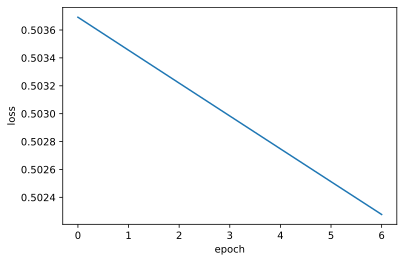

In [4]:
def train_sgd(lr, batch_size, num_epochs=2):
    return train(optimizers.sgd, lr, features, labels, batch_size, num_epochs)
gd_res = train_sgd(1, 1500, 6)

SGD

loss: 0.245394, 5.335659 sec per epoch


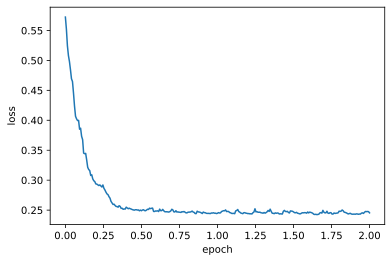

In [5]:
sgd_res = train_sgd(0.005, 1)

Mini-batch with batch size 100.

loss: 0.551266, 0.109671 sec per epoch


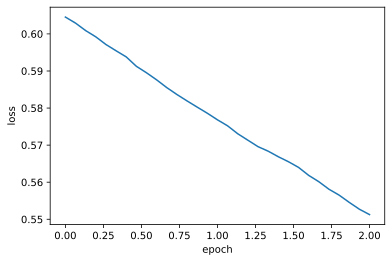

In [6]:
mini1_res = train_sgd(.4, 100)

Mini-batch with batch size 10.

loss: 0.268618, 0.634318 sec per epoch


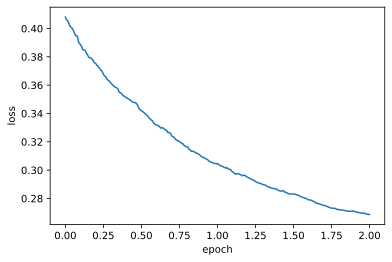

In [7]:
mini2_res = train_sgd(.05, 10)

Compare time versus loss

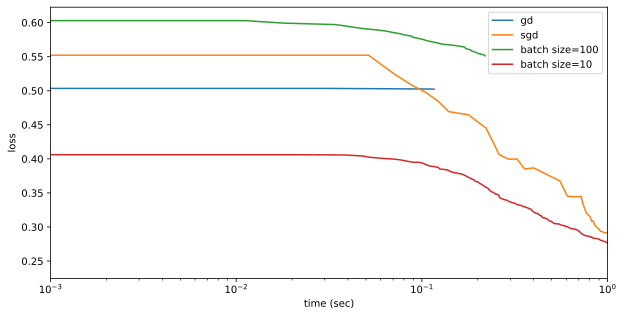

In [8]:
plt.figure(figsize=[10, 5])

for res in [gd_res, sgd_res, mini1_res, mini2_res]:
    plt.plot(res[0], res[1])
plt.xlabel('time (sec)')
plt.ylabel('loss')
plt.xscale('log')
plt.xlim([1e-3, 1])
plt.legend(['gd', 'sgd', 'batch size=100', 'batch size=10']);